## support vector machine soft margin ,and hard margin case 

In [20]:
import numpy as np  

In [21]:
import matplotlib.pyplot as plt 

In [22]:
from sklearn.datasets import load_iris 


In [23]:
from sklearn.datasets import make_moons 
 

In [24]:
from sklearn.svm import SVC 


In [30]:
Iris_Dataset = load_iris() 


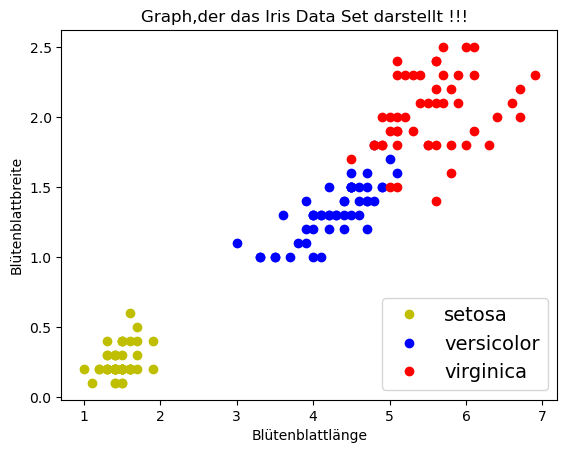

In [31]:
plt.figure(dpi=100)
plt.subplot(1,1,1)
plt.plot(Iris_Dataset.data[ : ,  2 ][Iris_Dataset.target==0],Iris_Dataset.data[ : ,  3 ][Iris_Dataset.target==0] , 'yo',label=Iris_Dataset.target_names[0])
plt.plot(Iris_Dataset.data[ : ,  2 ][Iris_Dataset.target==1],Iris_Dataset.data[ : ,  3 ][Iris_Dataset.target==1] , 'bo',label=Iris_Dataset.target_names[1])
plt.plot(Iris_Dataset.data[ : ,  2 ][Iris_Dataset.target==2],Iris_Dataset.data[ : ,  3 ][Iris_Dataset.target==2] , 'ro',label=Iris_Dataset.target_names[2])
plt.title("Graph,der das Iris Data Set darstellt !!!  ")
plt.xlabel ("Blütenblattlänge")
plt.ylabel("Blütenblattbreite")
plt.legend(loc='lower right' ,fontsize= 14)
plt.show()

## Hard margin case

In [12]:
## das Svm betimmen 

# hard margin Case1  :::: 
#lass uns nur Blütenblatt-Attribute Betrachten damit die wir die arbeit erleichtern und besser verstehen können  
Iris_input  = Iris_Dataset.data[ : , (2,3)]
Iris_output = Iris_Dataset.target
# das output zu binär umwandeln 
entweder_setosa_oder_versicolor =(Iris_output==0) |(Iris_output==1)
Iris_input=Iris_input[entweder_setosa_oder_versicolor]
Iris_output=Iris_output[entweder_setosa_oder_versicolor]
classifier= SVC(kernel='linear',C=float("inf"),gamma='scale')
#classifier= SVC(C=float("inf"),gamma='scale')
classifier.fit(Iris_input,Iris_output)
#Decision boundry 
slope= classifier.coef_[0] # W
intercept= classifier.intercept_[0]

steps  = np.linspace(0,4,1000 )
decision_boundry  = -slope[0]/slope[1]*steps-intercept/slope[1]
#support vecrtor 
margin = 2/slope[1]
topSupportVector  = decision_boundry+0.5*margin
bottomsupportVector = decision_boundry-0.5*margin
#if we want to see what are the support vector 
Supportvector =classifier.support_vectors_

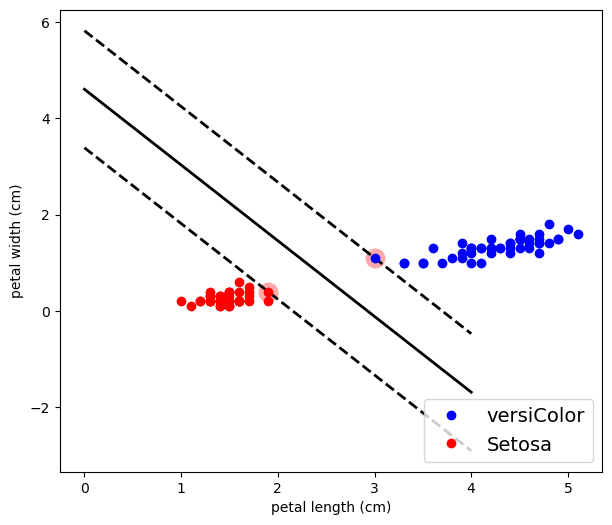

In [13]:
#plot 
plt.figure (1,figsize=(7,6))
plt.scatter(Supportvector[: , 0],Supportvector[: , 1] , s=180 ,facecolors="#FFAAAA" )
plt.plot(steps,decision_boundry,"k-",linewidth=2)
plt.plot(steps,topSupportVector,"k--",linewidth=2)
plt.plot(steps,bottomsupportVector,"k--",linewidth=2)
plt.plot(Iris_input[ : ,  0 ][Iris_output==1],Iris_input[ : ,  1 ][Iris_output==1] , 'bo',label="versiColor")
plt.plot(Iris_input[ : ,  0 ][Iris_output==0],Iris_input[ : ,  1 ][Iris_output==0] , 'ro',label="Setosa")
plt.xlabel(Iris_Dataset.feature_names[2])
plt.ylabel(Iris_Dataset.feature_names[3])
plt.legend(loc='lower right' ,fontsize=14)
plt.show()




## Soft margin case 

In [34]:

#lass uns nur Blütenblatt-Attribute Betrachten damit die wir die arbeit erleichtern und besser verstehen können  
Iris_input  = Iris_Dataset.data[ : , (2,3)]
Iris_output = Iris_Dataset.target
# das output zu binär umwandeln 
entweder_setosa_oder_versicolor =(Iris_output==1) |(Iris_output==2)
Iris_input=Iris_input[entweder_setosa_oder_versicolor]
Iris_output=Iris_output[entweder_setosa_oder_versicolor]

#4
classifier4= SVC(kernel='rbf',gamma=5 , C=100)
classifier4.fit(Iris_input,Iris_output)

#decsion boundry 
input_0_S= np.linspace(0,7.5,400)
input_1_S = np.linspace(0.5,3,400)
input_0 , input_1 = np.meshgrid(input_0_S , input_1_S)
x=np.c_[input_0.ravel(),input_1.ravel()]



y4_predict=classifier4.predict(x).reshape(input_0.shape)
#support vector 
y4_decision=classifier4.decision_function(x).reshape(input_0.shape)






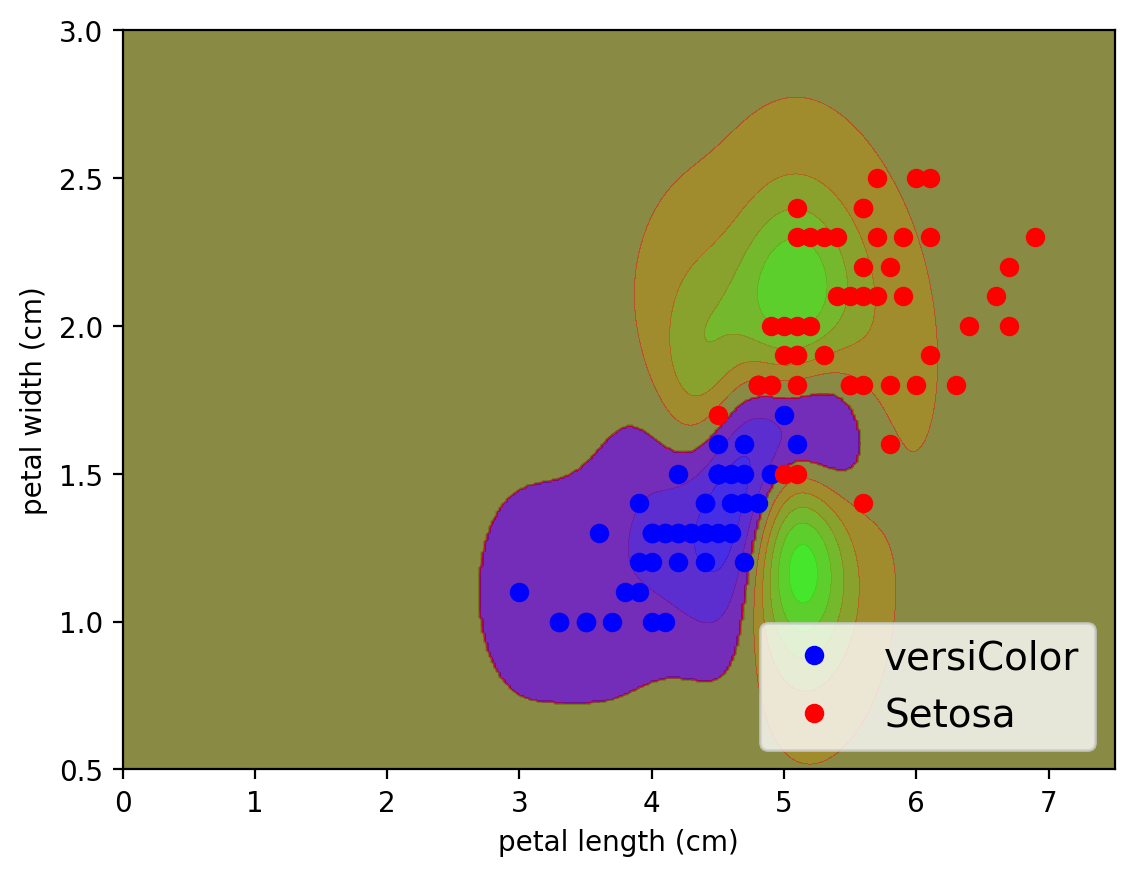

In [35]:
#plot 
plt.figure (dpi=200)
plt.clf()
plt.contourf(input_0,input_1 , y4_predict ,cmap=plt.cm.brg ,alpha=0.7 )
plt.contourf(input_0,input_1 , y4_decision ,cmap=plt.cm.brg ,alpha=0.4 )
plt.plot(Iris_input[ : ,  0 ][Iris_output==1],Iris_input[ : ,  1 ][Iris_output==1] , 'bo',label="versiColor")
plt.plot(Iris_input[ : ,  0 ][Iris_output==2],Iris_input[ : ,  1 ][Iris_output==2] , 'ro',label="Setosa")
plt.xlabel(Iris_Dataset.feature_names[2])
plt.ylabel(Iris_Dataset.feature_names[3])
plt.legend(loc='lower right' ,fontsize=14)
plt.show()